# Project: Wrangling and Analyze Data - We Rate Dogs Project

# Project Description

> In this project we will gather data from different sources with the ***We Rate Dogs*** twitter archive being the main source of data. There are over 5000 tweets in this dataset. This dataset will be augmented with extra data using the twitter API and the tweepy and requests libraries.

>After gathering all the data needed, we will clean them and analyse them in documented steps

## Importing the necessary libraries and packages

In [1]:
#importing all the necessary libraries and packages
import pandas as pd
import numpy as np
import os
import requests as req
import json
import tweepy
import time
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

**Setting options to display full rows of DataFrames**

In [10]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

## 1. Gathering the Data

### 1.a Importing the ***We Rate Dogs*** twitter archive

In [3]:
#read the We Rate Dogs twitter archive (enhanced datacet) into a DataFrame
df_wrd_archive = pd.read_csv('twitter-archive-enhanced.csv')

#check if the data was loaded
df_wrd_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### 1.b Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#use the requests library to dowload the image predictions data and read it into a DataFrame
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = req.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

#check if the data was downloaded/loaded
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.c Using the Tweepy library to query additional data via the Twitter API (stored in *tweet_json.txt*)

In [10]:
#personal Twitter API Key, Secret and Token
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

In [11]:
#Twitter API authorization
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [12]:
#get a list of tweet IDs from the enhanced dataset
tweet_ids = df_wrd_archive.tweet_id.values

#print the number of tweet IDs
print('# of tweet ids: ' + str(len(tweet_ids)))

# of tweet ids: 2356


#### Querying the Twitter API to get the json data from the enhanced dataset 

In [16]:
tweet_json_list = [] #create an empty list to store the json data from the query
fails = {} #create an empty dictionary to store the list of failed queries

start_time = time.time() #initialise a start time

for tweet_id in tweet_ids:
    try: #attempt to get the each tweet's json data and append it to tweet_json_list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.error.TweepError as e:
        print("Query errory for tweet id:  " + str(tweet_id)) #print out each query error
        fails[tweet_id] = e #save the error to the fails dictionary for review
        pass #fail-safe code to avoid getting an error when empty code is not allowed.
    
time_elapsed = time.time() - start_time

execution_time = time.strftime("%H:%M:%S", time.gmtime(time_elapsed))
print("\nTotal execution time (HH:MM:SS):  " + execution_time + "\n")

#print out all tweet ids with errors 
print("Number of query errors:  {}\n".format(len(fails)))
#for tweet_id in fails:
#    print(tweet_id, fails[tweet_id])

Query errory for tweet id:  888202515573088257
Query errory for tweet id:  877611172832227328
Query errory for tweet id:  873697596434513921
Query errory for tweet id:  872668790621863937
Query errory for tweet id:  872261713294495745
Query errory for tweet id:  869988702071779329
Query errory for tweet id:  866816280283807744
Query errory for tweet id:  861769973181624320
Query errory for tweet id:  856602993587888130
Query errory for tweet id:  856330835276025856
Query errory for tweet id:  851953902622658560
Query errory for tweet id:  851861385021730816
Query errory for tweet id:  845459076796616705
Query errory for tweet id:  844704788403113984
Query errory for tweet id:  842892208864923648
Query errory for tweet id:  837366284874571778
Query errory for tweet id:  837012587749474308
Query errory for tweet id:  829374341691346946
Query errory for tweet id:  827228250799742977
Query errory for tweet id:  812747805718642688
Query errory for tweet id:  802247111496568832
Query errory 

After reading the json data, we write (*dump*) it out to a file labeled as ***tweet_json.txt***

In [17]:
with open('tweet_json.txt', 'w') as outfile:
    for tweet_json in tweet_json_list:
        json.dump(tweet_json, outfile)
        outfile.write('\n')

Let's check if the data was written to file

In [18]:
#checking to see if the tweet_json.text file was written to file
print(list(filter(os.path.isfile, os.listdir())))

['twitter-archive-enhanced.csv', 'twitter_archive_master.csv', 'tweet_json.csv', 'tweet_json.txt', 'wrangle_report.pdf', 'act_report.pdf', 'image-predictions.tsv', 'wrangle_act.ipynb']


After *dumping* the json data, we read it into a DataFrame

In [19]:
#create an empty list to store the variables to be extracted from the json data
tweet_json = []

#read in the json data from the text file, and save it to a DataFrame
with open('tweet_json.txt', 'r') as file:
    line = file.readline()
    while line:
        tweet = json.loads(line)

        # extract each tweet's id, retweet_count and favorite_count from the json data
        tweet_id = tweet['id']
        tweet_retweet_count = tweet['retweet_count']
        tweet_favorite_count = tweet['favorite_count']
        
        # create a dictionary with the extracted variables from the json data
        json_data = {'tweet_id': tweet_id, 
                     'retweet_count': tweet_retweet_count, 
                     'favorite_count': tweet_favorite_count
                    }
        
        #append the dictionary to the tweet_json list
        tweet_json.append(json_data)

        #while there's still json data to be read, read the next line of the data
        line = file.readline()
        

#convert the tweet_json list into a DataFrame
df_tweet_json = pd.DataFrame(tweet_json, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

#check if the DataFrame was correctly created
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6954,33644
1,892177421306343426,5258,29180
2,891815181378084864,3462,21948
3,891689557279858688,7176,36721
4,891327558926688256,7705,35118


**Saving the df_tweet_json DataFram to csv**

In [20]:
df_tweet_json.to_csv('tweet_json.csv', index=False)

Let's check if the tweet_json.csv file was written to file

In [21]:
print(list(filter(os.path.isfile, os.listdir())))

['twitter-archive-enhanced.csv', 'twitter_archive_master.csv', 'tweet_json.csv', 'tweet_json.txt', 'wrangle_report.pdf', 'act_report.pdf', 'image-predictions.tsv', 'wrangle_act.ipynb']


## 2. Assessing the Data
We will start assessing the data gathered before we can do any cleaning, then analyze the data



**Accessing the enhanced twitter archive dataset**

In [22]:
df_wrd_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
df_wrd_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [23]:
df_wrd_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

**Checking the *source* column**

In [24]:
#checking the unique values of the source column
df_wrd_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

**Checking the *extended_urls* column**

In [25]:
#checking for number of tweets with missing extended_urls
sum(df_wrd_archive.expanded_urls.isna())

59

In [26]:
#checking if the tweets with missing extended_urls are original tweets or otherwise
#if they are not original tweets, they will have data for the in_reply_to_status_id and in_reply_to_user_id columns
mask1 = df_wrd_archive.expanded_urls.isna()
df_wrd_archive[mask1].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [27]:
#checking for number of tweets with missing extended_urls which are replies are retweets
sum(df_wrd_archive.expanded_urls.isna() & df_wrd_archive.in_reply_to_status_id.isna() & \
    df_wrd_archive.retweeted_status_id.isna())

3

In [28]:
#list those tweets with missing extended_urls which are not replies and retweets but are actual tweets
#if they are are actual tweets, they should not have data in the in_reply_to_status_id and in_reply_to_user_id columns
mask2 = df_wrd_archive.expanded_urls.isna() & df_wrd_archive.in_reply_to_status_id.isna() & \
    df_wrd_archive.retweeted_status_id.isna()
df_wrd_archive[mask2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [29]:
#checking if there are tweets with missing extended_urls in the df_image_predictions dataset 
no_expanded_urls = [828361771580813312, 785515384317313025, 696518437233913856]
tweets_in_predictions = df_image_predictions.tweet_id.isin(no_expanded_urls)
sum(tweets_in_predictions)

0

In [30]:
#checking if there are tweets with missing extended_urls in the df_tweet_json dataset
tweets_in_tweet_json = df_tweet_json.tweet_id.isin(no_expanded_urls)
sum(tweets_in_tweet_json)

3

In [31]:
#list those tweets with missing extended_urls that are in the df_tweet_json dataset
df_tweet_json[tweets_in_tweet_json]

,tweet_id,retweet_count,favorite_count
357,828361771580813312,165,2058
686,785515384317313025,1154,5764
1416,696518437233913856,1559,3620


**Checking the *rating_numerator* and *rating_denominator* columns**

In [32]:
df_wrd_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [33]:
#listing and sorting the rating_denominator values
df_wrd_archive.rating_denominator.value_counts().sort_index(ascending = False)

170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     3   
40     1   
20     2   
16     1   
15     1   
11     3   
10     2333
7      1   
2      1   
0      1   
Name: rating_denominator, dtype: int64

In [34]:
#checking number of rating_denominator values that are not exactly 10
sum(df_wrd_archive.rating_denominator != 10)

23

In [35]:
#checking number of rating_denominator values that are less than 10
sum(df_wrd_archive.rating_denominator < 10)

3

In [36]:
#checking number of rating_denominator values that are greater than 10
sum(df_wrd_archive.rating_denominator > 10)

20

In [37]:
#print out tweets that do NOT have denominator of 10 and are NOT replies and are NOT retweets
mask_tweets = (df_wrd_archive.rating_denominator != 10) & \
            df_wrd_archive.in_reply_to_status_id.isna() & \
            df_wrd_archive.retweeted_status_id.isna()

cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', \
             'puppo']
df_wrd_archive[mask_tweets][cols].head()

,text,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,820690176645140481,84,70,None,None,None,None,None
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,810984652412424192,24,7,Sam,None,None,None,None
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,758467244762497024,165,150,None,None,None,None,None
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",740373189193256964,9,11,None,None,None,None,None
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,731156023742988288,204,170,this,None,None,None,None


In [34]:
#listing and sorting the rating_numerator values
df_wrd_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776    1  
960     1  
666     1  
420     2  
204     1  
182     1  
165     1  
144     1  
143     1  
121     1  
99      1  
88      1  
84      1  
80      1  
75      2  
60      1  
50      1  
45      1  
44      1  
27      1  
26      1  
24      1  
20      1  
17      1  
15      2  
14      54 
13      351
12      558
11      464
10      461
9       158
8       102
7       55 
6       32 
5       37 
4       17 
3       19 
2       9  
1       9  
0       2  
Name: rating_numerator, dtype: int64

In [38]:
sum(df_wrd_archive.rating_numerator >= 20)

25

In [44]:
#checking to see if the tweets with rating_numerator of 0 are valid tweets
zero_numerator = df_wrd_archive.rating_numerator.min()
df_wrd_archive.query('rating_numerator == @zero_numerator')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


**Checking the *name* column**

In [45]:
#checking the counts of unique names
df_wrd_archive.name.value_counts().head(20)

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
Oliver     11 
Tucker     10 
Penny      10 
Lola       10 
Bo         9  
Winston    9  
the        8  
Sadie      8  
Daisy      7  
Buddy      7  
Bailey     7  
an         7  
Toby       7  
Jax        6  
Rusty      6  
Name: name, dtype: int64

In [42]:
sum(df_wrd_archive.name.str.islower())

109

**Accessing the image predictions dataset**

In [48]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [40]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
#checking if all values are True (lst prediction of a dog)
df_image_predictions.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [47]:
#checking if all values are True (2nd prediction of a dog)
df_image_predictions.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [49]:
#checking if all values are True (3rd prediction of a dog)
df_image_predictions.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [50]:
#check sample of predictions that are not dogs
df_image_predictions[~df_image_predictions.p1_dog & \
               ~df_image_predictions.p2_dog & \
               ~df_image_predictions.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head()

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False


**Accessing the tweets json dataset**

In [51]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
tweet_id          2326 non-null int64
retweet_count     2326 non-null int64
favorite_count    2326 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [52]:
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6954,33644
1,892177421306343426,5258,29180
2,891815181378084864,3462,21948
3,891689557279858688,7176,36721
4,891327558926688256,7705,35118


### Quality issues
**Enhanced archive dataset**
1. There are 181 retweets as compared to 2356 tweets

2. There are 59 tweets with missing *expanded_urls* and possible links to images
    - There are actually 56 tweets that are replies and/or retweets. These tweets will be deleted since they are not originial tweets
    - There are 3 tweets with missing *extended_urls*. These tweets do not appear in the df_image_predictions dataset and so they have no images

3. *timestamp* is a string datatype instead of a datetime datatype

4. The *source* column has 4 distinct values which can be extracted from the text

5. *rating_numerator*
    - rating_numerator has some very large values
    - about 25 rating_numberator values are greater than or equal to 20. (20 was chosen arbitrarily). these ones may have to be dropped
    - 2 rating_numerator values are 0. Further checks reveal that one of those tweets with index 1016 is not an original tweet 

6. rating_denominator*
    - rating_denominator has some values greater than 10
    - 23 rating_denominator values are greater than or less than 10 (20 are greater than 10 and 3 are less than 10)
    - It's likely tweets with rating_denominator not 10 have multiple dogs in them
    - Drop rows with multiple dogs, and manually reset rating_denominator for single dogs

7. *name column**
    - Invalid data for dog names (a, the, an)
    - All valid names start with uppercase. There are 109 names that start with lowercase
    
**Image predictions dataset**

8. *p1_dog, p2_dog and p3_dog*
    - contain False values, meaning there are no images of dogs
    - there are 324 predictions that are not dogs. These rows will be dropped

### Tidiness issues
**Enhanced archive dataset**

1. *name*
    - There are 4 columns with dog stages. These columns should be *melted* into 1 column since they all describe a dog's stage

2. 3 different datasets which can be merged into a single master dataset

## 3. Cleaning Data
In this session, we are going to clean all issues identified in the datasets

In [53]:
#making copies of original pieces of data
df_wrd_archive_clean = df_wrd_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_json_clean = df_tweet_json.copy()


## Quality Issues

### Issue #1:
We are only interested in original tweets. Retweets and replies are not needed

#### Define:
Drop all retweets and replies, leaving only original tweets

#### Code

In [54]:
#removing all rows with retweets and replies
df_wrd_archive_clean = df_wrd_archive_clean[pd.isnull(df_wrd_archive_clean.retweeted_status_id)]
df_wrd_archive_clean = df_wrd_archive_clean[pd.isnull(df_wrd_archive_clean.in_reply_to_status_id)]

In [55]:
#dropping all columns relating to retweets and replies
df_wrd_archive_clean = df_wrd_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id',\
                                                  'retweeted_status_timestamp','in_reply_to_status_id',\
                                                  'in_reply_to_user_id'], axis = 1)

#### Test

In [56]:
#listing remaining columns of the dataset after dropping the unnecessary ones
list(df_wrd_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #2:
Tweets with missing *extended_urls*

#### Define
Drop rows with missing *extended_urls* 

#### Code

In [57]:
df_wrd_archive_clean = df_wrd_archive_clean[df_wrd_archive_clean.expanded_urls.notnull()]

#### Test

In [58]:
df_wrd_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


### Issue #3:
*timestamp* is a string datatype instead of a datetime datatype (inconsistent data)

#### Define
Convert *timestamp* form string datatype to datatime datatype

#### Code

In [59]:
#coverting the timestamp to a datetime datatype
df_wrd_archive_clean.timestamp = pd.to_datetime(df_wrd_archive_clean.timestamp)
df_wrd_archive_clean.timestamp = df_wrd_archive_clean.timestamp.dt.floor('s')

#### Test

In [60]:
#checking the new datatype of timestamp
df_wrd_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.7+ KB


### Issue #4:
The *source* column has 4 distinct values which can be extracted from the text

#### Define
Extract unique displays from source text. Display is between *`<a href="">`* and *`</a>`*

#### Code

In [61]:
#extracting displays from source text
df_wrd_archive_clean.source = df_wrd_archive_clean.source.str.extract('^<a.+>(.+)</a>$')

#### Test

In [62]:
#checking the unique different displays from *source*
df_wrd_archive_clean.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene    91  
Twitter Web Client     30  
TweetDeck              11  
Name: source, dtype: int64

### Issue 5:
*rating_numerator* greater than or equal to 20

#### Define
Drop rating_numerator greater than or equal to 20

#### Code

In [63]:
#checking the rating_numerator value counts
df_wrd_archive_clean.rating_numerator.value_counts().sort_index()

0       1  
1       5  
2       9  
3       19 
4       16 
5       34 
6       32 
7       52 
8       98 
9       153
10      434
11      413
12      485
13      287
14      38 
24      1  
26      1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      1  
80      1  
84      1  
88      1  
99      1  
121     1  
144     1  
165     1  
204     1  
420     1  
1776    1  
Name: rating_numerator, dtype: int64

In [64]:
#dropping rating_numerator values greater than or equal to 20
df_wrd_archive_clean = df_wrd_archive_clean[df_wrd_archive_clean.rating_numerator <= 20]

#### Test

In [65]:
#checking the new rating_numerator value counts
df_wrd_archive_clean.rating_numerator.value_counts().sort_index()

0     1  
1     5  
2     9  
3     19 
4     16 
5     34 
6     32 
7     52 
8     98 
9     153
10    434
11    413
12    485
13    287
14    38 
Name: rating_numerator, dtype: int64

### Issue #6:
*rating_denominator* greater than 10

#### Define
Drop tweets with *rating_denominator* greater than 10

#### Code

In [66]:
df_wrd_archive_clean = df_wrd_archive_clean[df_wrd_archive_clean.rating_denominator == 10]

#### Test

In [67]:
#checking rating_denominator values
df_wrd_archive_clean.rating_denominator.value_counts()

10    2072
Name: rating_denominator, dtype: int64

### Issue #7:
Invalid data for dog names (a, the, an)

#### Define
Replace all invalid dog names (names that start with lowercases) with *None*

#### Code

In [68]:
#extracting all invalid dog names into a mask
invalid_names = df_wrd_archive_clean.name.str.contains(r'^[a-z]')
df_wrd_archive_clean[invalid_names].name.value_counts()

a               54
the             8 
an              5 
one             4 
very            4 
quite           3 
just            3 
getting         2 
actually        2 
not             2 
all             1 
infuriating     1 
my              1 
by              1 
such            1 
space           1 
mad             1 
incredibly      1 
his             1 
unacceptable    1 
old             1 
light           1 
life            1 
officially      1 
Name: name, dtype: int64

In [69]:
#replacing all invalid dog names with *None*
df_wrd_archive_clean.loc[invalid_names, 'name'] = 'None'

#### Test

In [70]:
#checking if all invalid dog names have been replaced with *None*
df_wrd_archive_clean[invalid_names].name.value_counts()

None    101
Name: name, dtype: int64

In [71]:
#sampling the name to confirm replacement of invalid dog names
df_wrd_archive_clean.name.sample(30)

1211    Bertson 
2147    Chester 
1768    Bella   
82      Ginger  
665     Mosby   
1300    Jiminus 
1215    Siba    
65      Bailey  
11      Bruno   
591     Mister  
2069    Clarence
1599    None    
751     None    
1754    Linda   
1549    Ferg    
1156    None    
413     None    
388     Pawnd   
1643    Sadie   
56      None    
1821    Vinnie  
1883    None    
253     Luna    
1450    None    
2227    None    
1934    Aiden   
2304    None    
1104    Buckley 
1346    Lucia   
1710    Penny   
Name: name, dtype: object

### Issue #8:
Some images in the *df_image_predictions* dataset are not those of dogs.

#### Define
Drop data with no images of dogs

#### Code

In [72]:
#checking data with no images of dogs
df_image_predictions_clean[~df_image_predictions_clean.p1_dog & \
               ~df_image_predictions_clean.p2_dog & \
               ~df_image_predictions_clean.p3_dog]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [73]:
#drop rows with no images of dogs
df_image_predictions_clean = df_image_predictions_clean[df_image_predictions_clean.p1_dog & \
               df_image_predictions_clean.p2_dog & \
               df_image_predictions_clean.p3_dog]

#### Test

In [74]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1243 non-null int64
jpg_url     1243 non-null object
img_num     1243 non-null int64
p1          1243 non-null object
p1_conf     1243 non-null float64
p1_dog      1243 non-null bool
p2          1243 non-null object
p2_conf     1243 non-null float64
p2_dog      1243 non-null bool
p3          1243 non-null object
p3_conf     1243 non-null float64
p3_dog      1243 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 100.8+ KB


## Tidiness Issues

### Issue #1:
There are 4  different columns with dog stages.

#### Define
*Melt* the 4 different dog stage columns into a single column ***stage***

#### Code

In [75]:
#merge different dog types into a new column dog_stage
df_wrd_archive_clean['dog_stage'] = df_wrd_archive_clean[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)), axis=1)
df_wrd_archive_clean['dog_stage'] = df_wrd_archive_clean['dog_stage'].str.replace(r'(None,)', repl='')

In [76]:
#dropping the puppo, pupper, floofer, and doggo columns
df_wrd_archive_clean = df_wrd_archive_clean.drop(['puppo','pupper','floofer','doggo'], axis=1)

#### Test

In [77]:
#checking the new dataframe
df_wrd_archive_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1444,696713835009417216,2016-02-08 15:14:57,Twitter for iPhone,This is Trevith. He's a Swiss Mountain Roadwoof. Breeze too powerful. 9/10 stay strong pupper https://t.co/6J8Ibwy1X6,https://twitter.com/dog_rates/status/696713835009417216/photo/1,9,10,Trevith,"pupper,None"
1810,676821958043033607,2015-12-15 17:51:44,Twitter for iPhone,Finally some constructive political change in this country. 11/10 https://t.co/mvQaETHVSb,"https://twitter.com/dog_rates/status/676821958043033607/photo/1,https://twitter.com/dog_rates/status/676821958043033607/photo/1",11,10,None,None
715,783839966405230592,2016-10-06 01:23:05,Twitter for iPhone,This is Riley. His owner put a donut pillow around him and he loves it so much he won't let anyone take it off. 13/10 https://t.co/8TCQcsZCZ8,"https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1",13,10,Riley,None
1654,683449695444799489,2016-01-03 00:47:59,Twitter for iPhone,I just want to be friends with this dog. Appears to be into the sports. A true brobean. 10/10 would introduce to mom https://t.co/1Z7Q6svWpe,https://twitter.com/dog_rates/status/683449695444799489/photo/1,10,10,None,None
2147,669753178989142016,2015-11-26 05:42:55,Twitter for iPhone,Meet Chester. He just ate a lot and now he can't move. 10/10 that's going to be me in about 17 hours https://t.co/63jh1tYZa5,https://twitter.com/dog_rates/status/669753178989142016/photo/1,10,10,Chester,None
414,822859134160621569,2017-01-21 17:31:20,Twitter for iPhone,This is Hobbes. He was told he was going to the park. Ended up at the vet. H*ckin bamboozled. Quite pupset with you. 12/10 https://t.co/SSQE06XClS,https://twitter.com/dog_rates/status/822859134160621569/photo/1,12,10,Hobbes,None
2248,667866724293877760,2015-11-21 00:46:50,Twitter for iPhone,This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https://t.co/SBmWbfAg6X,https://twitter.com/dog_rates/status/667866724293877760/photo/1,10,10,Shaggy,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None
1207,715733265223708672,2016-04-01 02:51:22,Twitter for iPhone,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,https://twitter.com/dog_rates/status/715733265223708672/photo/1,10,10,None,None
886,759943073749200896,2016-08-01 02:45:22,Vine - Make a Scene,Here's a wicked fast pupper. 12/10 camera could barely keep pup https://t.co/HtAR6gpUAu,https://vine.co/v/5AJm5pq7Kav,12,10,None,"pupper,None"


### Issue #2:
3 different datasets, but they can be merged into a single master dataset

#### Define
Merge all datasets into one master dataset

#### Code

In [78]:
#merging df_wr_archive_clean with df_tweet_json_clean
df_wrd_archive_clean = pd.merge(df_wrd_archive_clean, df_tweet_json_clean,
                         on = 'tweet_id', how = 'inner')

#### Test

In [79]:
#checking first 10 rows of the new dataset
df_wrd_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,6954,33644
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,5258,29180
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,3462,21948
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,7176,36721
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,7705,35118


In [80]:
df_wrd_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2063
Data columns (total 11 columns):
tweet_id              2064 non-null int64
timestamp             2064 non-null datetime64[ns]
source                2064 non-null object
text                  2064 non-null object
expanded_urls         2064 non-null object
rating_numerator      2064 non-null int64
rating_denominator    2064 non-null int64
name                  2064 non-null object
dog_stage             2064 non-null object
retweet_count         2064 non-null int64
favorite_count        2064 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 193.5+ KB


In [81]:
#merging the new dataset with the df_image_predictions_clean dataset
df_wrd_archive_clean = pd.merge(df_wrd_archive_clean, df_image_predictions_clean, on='tweet_id', how='inner')

In [82]:
df_wrd_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 0 to 1171
Data columns (total 22 columns):
tweet_id              1172 non-null int64
timestamp             1172 non-null datetime64[ns]
source                1172 non-null object
text                  1172 non-null object
expanded_urls         1172 non-null object
rating_numerator      1172 non-null int64
rating_denominator    1172 non-null int64
name                  1172 non-null object
dog_stage             1172 non-null object
retweet_count         1172 non-null int64
favorite_count        1172 non-null int64
jpg_url               1172 non-null object
img_num               1172 non-null int64
p1                    1172 non-null object
p1_conf               1172 non-null float64
p1_dog                1172 non-null bool
p2                    1172 non-null object
p2_conf               1172 non-null float64
p2_dog                1172 non-null bool
p3                    1172 non-null object
p3_conf               1172 non-nu

## 4. Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [83]:
#saving master dataset to file
df_wrd_archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [84]:
#checking if master dataset was saved to file
print(list(filter(os.path.isfile, os.listdir())))

['twitter-archive-enhanced.csv', 'twitter_archive_master.csv', 'tweet_json.csv', 'tweet_json.txt', 'wrangle_report.pdf', 'act_report.pdf', 'image-predictions.tsv', 'wrangle_act.ipynb']


## 5. Analyzing and Visualizing Data
In this section, we will analyze and visualize our master dataset. Will will also produce about **three (3) insights and one (1) visualization.**

In [85]:
#making a copy of the master dataset
df = df_wrd_archive_clean.copy()

In [86]:
#a sneek peak into the master dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 0 to 1171
Data columns (total 22 columns):
tweet_id              1172 non-null int64
timestamp             1172 non-null datetime64[ns]
source                1172 non-null object
text                  1172 non-null object
expanded_urls         1172 non-null object
rating_numerator      1172 non-null int64
rating_denominator    1172 non-null int64
name                  1172 non-null object
dog_stage             1172 non-null object
retweet_count         1172 non-null int64
favorite_count        1172 non-null int64
jpg_url               1172 non-null object
img_num               1172 non-null int64
p1                    1172 non-null object
p1_conf               1172 non-null float64
p1_dog                1172 non-null bool
p2                    1172 non-null object
p2_conf               1172 non-null float64
p2_dog                1172 non-null bool
p3                    1172 non-null object
p3_conf               1172 non-nu

In [87]:
#checking simple statistics about rating_numerator, retweet_count and favorite_count
df[['rating_numerator', 'retweet_count', 'favorite_count']].describe()

,rating_numerator,retweet_count,favorite_count
count,1172.000000,1172.000000,1172.000000
mean,10.925768,2216.180034,8009.719283
std,1.684952,3867.743845,11538.098747
min,2.000000,11.000000,66.000000
25%,10.000000,515.250000,1859.500000
50%,11.000000,1123.500000,3800.500000
75%,12.000000,2569.000000,9938.750000
max,14.000000,52505.000000,123439.000000


In [104]:
#a sample of tweets with the maximum ratings for dogs
max_rating = df.rating_numerator.max()
df.query('rating_numerator == @max_rating')[['tweet_id', 'text',\
                                             'rating_numerator',\
                                            'name', 'dog_stage', 'retweet_count']].head(2)

,tweet_id,text,rating_numerator,name,dog_stage,retweet_count
5,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,Cassie,doggo,6053
26,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",14,None,None,4769


In [88]:
df.rating_numerator.value_counts()

12    305
10    254
11    242
13    173
9     93 
8     50 
14    17 
7     15 
5     9  
6     8  
4     4  
3     1  
2     1  
Name: rating_numerator, dtype: int64

In [89]:
#the most common display source
df.source.value_counts()

Twitter for iPhone    1154
Twitter Web Client    14  
TweetDeck             4   
Name: source, dtype: int64

In [86]:
df.source.describe()

count     1172              
unique    3                 
top       Twitter for iPhone
freq      1154              
Name: source, dtype: object

### Insights:
1. The mean ratings for dogs is appr. 11 and the least was 0
 
2. The highest retweet of an original tweet about a dog during the period under consideration was 70,334 retweets

3. The most common display source for tweets was Twitter for iPhone

### Visualization

In [90]:
plt.rcParams['figure.figsize'] = (8, 8)

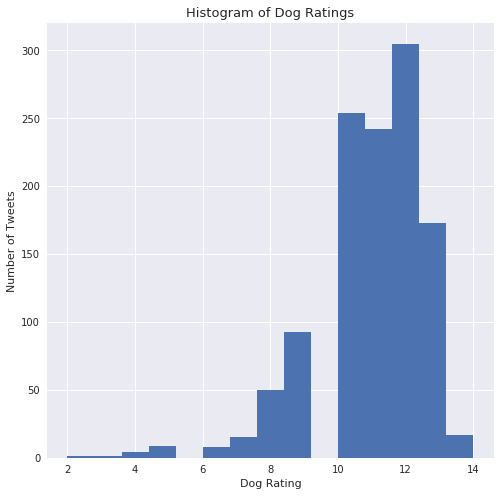

In [91]:
#plotting a histogram of dog ratings
df.rating_numerator.plot(kind='hist', bins=15)

plt.ylabel('Number of Tweets')
plt.xlabel('Dog Rating')
plt.title('Histogram of Dog Ratings', fontsize = 13)
plt.show();

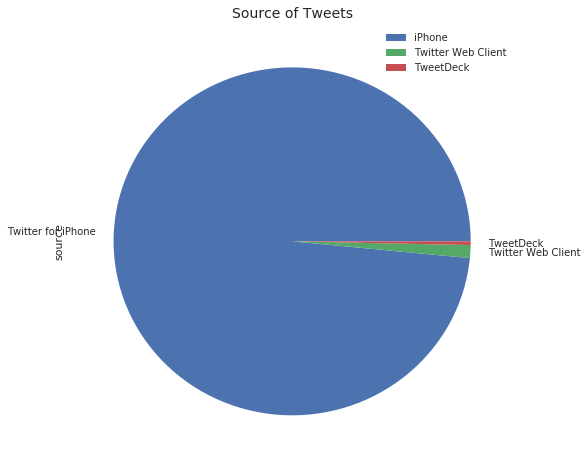

In [92]:
df.source.value_counts().plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Source of Tweets", {'fontsize': 14})
plt.legend(["iPhone", "Twitter Web Client", "TweetDeck"]);